In [88]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

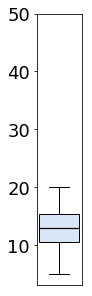

In [3]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
ax.xaxis.set_visible(False)
ax.set_xticks([])
#ax.set_xlim(0,.2)

y_range = (3,50)
ax.set_ylim(y_range)
ax.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax.boxplot(y, notch=False, medianprops={'linewidth':0}, meanprops=meanprops,
           widths=[.9], showmeans=True, meanline=True, sym='', patch_artist=True)
BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor=BLUE)       
plt.show()

In [18]:
np.random.seed(10)
y = np.append(np.zeros(50), np.ones(50))
x = np.random.randint(0,100, 100)

In [158]:
x

array([ 9, 15, 64, 28, 89, 93, 29,  8, 73,  0, 40, 36, 16, 11, 54, 88, 62,
       33, 72, 78, 49, 51, 54, 77, 69, 13, 25, 13, 92, 86, 30, 30, 89, 12,
       65, 31, 57, 36, 27, 18, 93, 77, 22, 23, 94, 11, 28, 74, 88,  9, 15,
       18, 80, 71, 88, 11, 17, 46,  7, 75, 28, 33, 84, 96, 88, 44,  5,  4,
       71, 88, 88, 50, 54, 34, 15, 77, 88, 15,  6, 85, 22, 11, 12, 92, 96,
       62, 57, 79, 42, 57, 97, 50, 45, 40, 89, 73, 37,  0, 18, 23])

In [159]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
df = pd.DataFrame(data={'x':x, 'y':y})

In [166]:
list(set(list(y)))

[0.0, 1.0]

In [167]:
se = [0,1]

In [168]:
[x[y==i] for i in se]

[array([ 9, 15, 64, 28, 89, 93, 29,  8, 73,  0, 40, 36, 16, 11, 54, 88, 62,
        33, 72, 78, 49, 51, 54, 77, 69, 13, 25, 13, 92, 86, 30, 30, 89, 12,
        65, 31, 57, 36, 27, 18, 93, 77, 22, 23, 94, 11, 28, 74, 88,  9]),
 array([15, 18, 80, 71, 88, 11, 17, 46,  7, 75, 28, 33, 84, 96, 88, 44,  5,
         4, 71, 88, 88, 50, 54, 34, 15, 77, 88, 15,  6, 85, 22, 11, 12, 92,
        96, 62, 57, 79, 42, 57, 97, 50, 45, 40, 89, 73, 37,  0, 18, 23])]

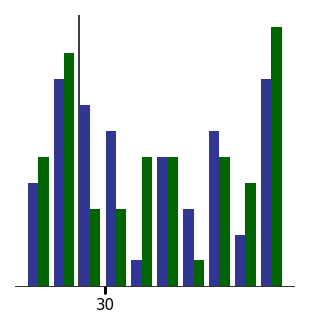

In [157]:
BLUE: '#4575b4'
YELLOW = "#fbfbd0" # "#fbfbd0" # "#FBFEB0"
GREEN = "#cfe2d4"
DARKBLUE = '#313695'
DARKGREEN = '#006400'


fig, ax = plt.subplots(1, 1, figsize=(5,5))
# ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

hist = ax.hist([df.x[df.y == np.unique(y)[0]],
                df.x[df.y == np.unique(y)[1]]],
               color=[DARKBLUE, DARKGREEN])
ax.axvline(x=20, c='black')
ax.set_xticks([30])
ax.tick_params(direction='out', length=8, width=3, colors='black', labelsize=15)

In [102]:
hist

([array([4., 8., 7., 6., 1., 5., 3., 6., 2., 8.]),
  array([ 5.,  9.,  3.,  3.,  5.,  5.,  1.,  5.,  4., 10.])],
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]),
 <a list of 2 Lists of Patches objects>)

In [105]:
hist[0]

[array([4., 8., 7., 6., 1., 5., 3., 6., 2., 8.]),
 array([ 5.,  9.,  3.,  3.,  5.,  5.,  1.,  5.,  4., 10.])]

In [106]:
hist[1]

array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ])